In [32]:
import random
import matplotlib.pyplot as plt

#### Setting up the Knapsack items and maximum weight

In [33]:
# Knapsack items
items = [
    {'weight': 5, 'value': 10},
    {'weight': 8, 'value': 40},
    {'weight': 3, 'value': 30},
    {'weight': 7, 'value': 25},
    {'weight': 6, 'value': 50},
    {'weight': 9, 'value': 35},
    {'weight': 2, 'value': 40},
    {'weight': 4, 'value': 10},
    {'weight': 7, 'value': 20},
    {'weight': 1, 'value': 10}
]
MAX_WEIGHT = 35

items

[{'weight': 5, 'value': 10},
 {'weight': 8, 'value': 40},
 {'weight': 3, 'value': 30},
 {'weight': 7, 'value': 25},
 {'weight': 6, 'value': 50},
 {'weight': 9, 'value': 35},
 {'weight': 2, 'value': 40},
 {'weight': 4, 'value': 10},
 {'weight': 7, 'value': 20},
 {'weight': 1, 'value': 10}]

#### Defining the GA parameters

In [34]:
# GA parameters
POP_SIZE = 100
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.02
MAX_GENERATIONS = 1000

### Defining the GA functions
#### Fitness function

In [35]:
def fitness(chromosome):
    total_value = 0
    total_weight = 0
    for i in range(len(chromosome)):
        if chromosome[i] == 1:
            total_value += items[i]['value']
            total_weight += items[i]['weight']
    if total_weight > MAX_WEIGHT:
        return 0
    return total_value

#### Mutation function

In [36]:
def mutate(chromosome):
    for i in range(len(chromosome)):
        if random.random() < MUTATION_RATE:
            chromosome[i] = 1 - chromosome[i]
    return chromosome


#### Crossover function

In [37]:
def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        point = random.randint(1, len(parent1)-1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    else:
        return parent1, parent2


#### Selection function

In [38]:
def selection(population):
    selected = []
    pop_fitness = [fitness(p) for p in population]
    total_fitness = sum(pop_fitness)
    for i in range(0, POP_SIZE, 2):
        parents = random.choices(population, weights=pop_fitness, k=2)
        children = crossover(parents[0], parents[1])
        selected.extend(children)
    return selected


#### Genetic algorithm

In [39]:
def genetic_algorithm():
    # Initialize population
    population = [[random.randint(0, 1) for _ in range(10)] for _ in range(POP_SIZE)]
    print("Initial Population:")
    for i in range(POP_SIZE):
        print(f"Chromosome {i}: {population[i]}")
        
    print("\nRunning Genetic Algorithm...\n")

    # Lists to store fitness data
    best_fitnesses = []
    avg_fitnesses = []
    worst_fitnesses = []

    for generation in range(MAX_GENERATIONS):
        population = selection(population)
        for i in range(POP_SIZE):
            population[i] = mutate(population[i])

        # Collect fitness data
        best_fitnesses.append(max([fitness(ind) for ind in population]))
        avg_fitnesses.append(sum([fitness(ind) for ind in population]) / POP_SIZE)
        worst_fitnesses.append(min([fitness(ind) for ind in population]))

        # Print best solution of this generation (optional)
        best_chromosome = max(population, key=fitness)
        if generation % 100 == 0 or generation == MAX_GENERATIONS - 1:
            print(f"Generation {generation}: Value = {fitness(best_chromosome)} || Items = {best_chromosome}")

    all_fitness_data = {
        "best_fitnesses": best_fitnesses,
        "avg_fitnesses": avg_fitnesses,
        "worst_fitnesses": worst_fitnesses
    }
    return max(population, key=fitness), all_fitness_data


In [40]:
best_solution, all_fitness_data = genetic_algorithm()
print(f"Best Solution: Value = {fitness(best_solution)} || Items = {best_solution}")


Initial Population:
Chromosome 0: [1, 0, 1, 1, 1, 0, 1, 1, 1, 0]
Chromosome 1: [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]
Chromosome 2: [0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
Chromosome 3: [1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
Chromosome 4: [1, 0, 1, 1, 0, 0, 1, 0, 0, 0]
Chromosome 5: [0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
Chromosome 6: [1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
Chromosome 7: [1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
Chromosome 8: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Chromosome 9: [1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
Chromosome 10: [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
Chromosome 11: [0, 0, 1, 0, 1, 0, 1, 1, 1, 1]
Chromosome 12: [0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
Chromosome 13: [0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
Chromosome 14: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
Chromosome 15: [1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
Chromosome 16: [1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
Chromosome 17: [1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
Chromosome 18: [0, 1, 0, 1, 1, 0, 1, 1, 0, 1]
Chromosome 19: [0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
Chromosome 20: [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
Chromosome 21: [0, 0, 0,

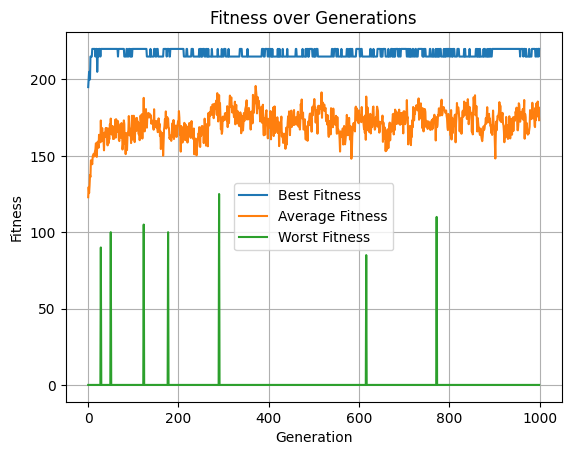

In [41]:
# Plotting fitness data
plt.plot(all_fitness_data["best_fitnesses"], label='Best Fitness')
plt.plot(all_fitness_data["avg_fitnesses"], label='Average Fitness')
plt.plot(all_fitness_data["worst_fitnesses"], label='Worst Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness over Generations')
plt.legend()
plt.grid(True)
plt.show()